#***FaultFindy***
*(Build intelligence using Machine Learning to predict the faulty tyre in
manufacturing)*

Import all necessary modules needed for project

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load the dataset from kaggle:-***

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
#This is the api key from kaggle dataset
!kaggle datasets download rpjinu/tyre-faultfindy

Dataset URL: https://www.kaggle.com/datasets/rpjinu/tyre-faultfindy
License(s): MIT
100% 2.66G/2.66G [00:28<00:00, 137MB/s] 
100% 2.66G/2.66G [00:28<00:00, 100MB/s]


In [4]:
#unzip the file
zip_ref = zipfile.ZipFile('/content/tyre-faultfindy.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#***Prepare the Dataset:-***
1.Use ImageDataGenerator to load and preprocess the images.\
2.Split the data into training and validation sets.

In [5]:
# Path to dataset
dataset_path = "/content/Faultfindy"
# ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Load training data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Adjust based on your model's input size
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 1486 images belonging to 2 classes.


In [6]:
# Load validation data
validation_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 370 images belonging to 2 classes.


## ***Build the CNN model:-***

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

#***Compile the Model:-***

In [8]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [9]:
# Train the model
history = model.fit(
    train_data,
    epochs=10,  # Adjust number of epochs as needed
    validation_data=validation_data
)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.5543 - loss: 0.9390 - val_accuracy: 0.5514 - val_loss: 0.7047
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.6449 - loss: 0.6513 - val_accuracy: 0.7270 - val_loss: 0.5720
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7096 - loss: 0.5844 - val_accuracy: 0.6189 - val_loss: 0.6085
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.7176 - loss: 0.5728 - val_accuracy: 0.7135 - val_loss: 0.5966
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.7428 - loss: 0.5447 - val_accuracy: 0.6027 - val_loss: 0.6219
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7617 - loss: 0.5187 - val_accuracy: 0.7108 - val_loss: 0.5860
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7505 - loss: 0.5187 - val_accuracy: 0.4892 - val_loss: 0.7058
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.7603 - loss: 0.4974 - val_accuracy: 0.7135 - val_loss

# ***Evaluate the model:-***

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_data)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 931ms/step - accuracy: 0.7506 - loss: 0.6870
Validation Loss: 0.7824310064315796, Validation Accuracy: 0.7027027010917664


#***save the model:-***

In [11]:
# Save the model
model.save("tyre_fault_detection_model.h5")

#***load the model:-***

In [17]:
# Load the saved model
loaded_model = load_model('tyre_fault_detection_model.h5')

#check model work on random tyre image:-

In [35]:
# Load a random tire image
img_path = '/content/image.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size

In [ ]:
# Convert the image to a numpy array and normalize pixel values
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

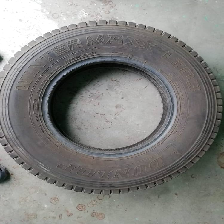

In [37]:
img

***it looks type good tyre to me lest check what model predict***

In [47]:
# Make a prediction
prediction = loaded_model.predict(img_array)

# Interpret the prediction
if prediction[0] < 0.5:
    print("Prediction: Faulty Tyre")
else:
    print("Prediction: Good Tyre")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: Good Tyre


***Prediction was right that means model working properly***

#check on another one :-

In [44]:
# Load a random tire image
img2_path = '/content/images.jpeg'  # Replace with the path to your image
img2 = image.load_img(img2_path, target_size=(224, 224))  # Resize to match model input size

In [45]:
# Convert the image to a numpy array and normalize pixel values
img2_array = image.img_to_array(img2) / 255.0
img2_array = np.expand_dims(img2_array, axis=0)  # Add batch dimension

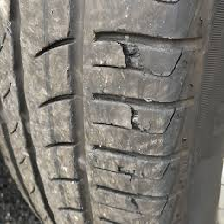

In [46]:
img2

***it looks type faulty/bad tyre to me lest check what model predict***

In [48]:
# Make a prediction
prediction = loaded_model.predict(img2_array)

# Interpret the prediction
if prediction[0] < 0.5:
    print("Prediction: Faulty Tyre")
else:
    print("Prediction: Good Tyre")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: Faulty Tyre


***Prediction was right that means model working properly***